In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


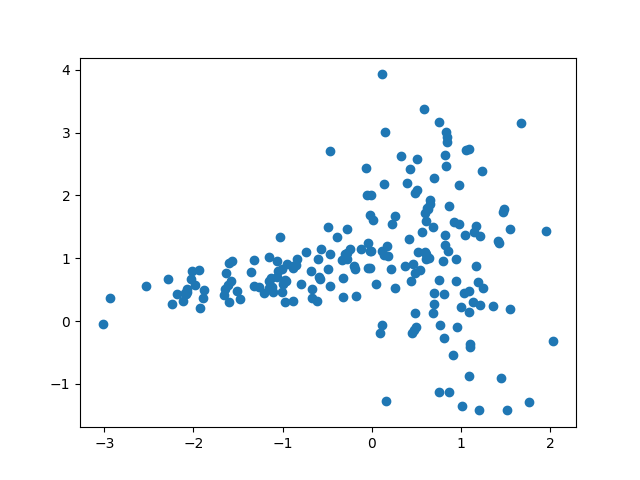

In [4]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

In [42]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=20) # n_init : int, default: 10  - Number of time the k-means algorithm will be run with different centroid seeds.
clf.fit(Xc_2)
predicted= clf.predict(Xc_2)
centroids= clf.cluster_centers_

In [43]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  

compute_distances(Xc_2, centroids)


array([[2.76781574, 0.6940029 , 1.73008528, ..., 2.48700229, 0.85400267,
        2.56509261],
       [2.11658107, 0.91555568, 0.51862956, ..., 2.29681336, 1.12598298,
        1.04628117],
       [0.23237467, 2.65641672, 2.71901989, ..., 0.93615   , 2.11828529,
        2.71086683],
       ...,
       [3.48726006, 1.43434107, 0.87874984, ..., 3.61262835, 2.08936284,
        1.41590557],
       [1.16816034, 1.32420186, 1.57575185, ..., 1.23730845, 0.84521997,
        1.91776116],
       [1.42080894, 2.70530937, 2.26112638, ..., 2.10725959, 2.46263595,
        1.85882939]])

In [44]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = Xc_2[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)

print ('Cost= {}'.format(J(centroids, predicted)))

Cost= 0.24111004454563367


In [60]:
J_hist = []
for i in range(1, 50):
    clf = KMeans(n_clusters=i)
    clf.fit(Xc_2)
    predicted= clf.predict(Xc_2)
    centroids= clf.cluster_centers_
    compute_distances(Xc_2, centroids)
    J_hist.append(J(centroids, predicted))
    
#plt.figure ()
#plt.plot(J_hist, linewidth=5)
#plt.xlabel('Centroids')
#plt.ylabel('Cost function J')

In [61]:
scores = np.array(J_hist)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

47
